# Part 1: Setup / Cleaning + Viz

In [1]:
# Standard libraries
import numpy as np
import pandas as pd

# Preprocessing
from sklearn_pandas import DataFrameMapper, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import train_test_split

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Performance metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

# For visualizing the decision tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

%matplotlib inline

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Load in data
data = pd.read_csv('TEST/30_sec_data.csv')

In [3]:
# Look at data
data.head()

,BPM,mode,mode_int,rmse_mean,rmse_std,spec_cent_mean,spec_cent_std,title,tonic_int,tonic_note,zcr_mean,zcr_std
0,99,minor,2,0.1534,0.0952,2022.30,1123.68,001 Love Yourself,6,F# / Gb,0.0978,0.0957
1,117,minor,2,0.1015,0.0760,1936.88,1174.04,001 Robin Thicke ft T,7,G,0.0904,0.0931
2,107,minor,2,0.0856,0.0522,2105.42,1159.97,001 Rolling In The Deep,7,G,0.0867,0.0764
3,117,major,1,0.1281,0.0885,2258.09,894.09,001-luis_fonsi_feat_daddy_yankee_-_despacito,2,D,0.1140,0.0706
4,89,minor,2,0.2135,0.0984,2170.56,996.12,001-sia_feat_sean_paul_-_cheap_thrills,6,F# / Gb,0.0983,0.0726


In [4]:
# Look at nulls
data.isnull().sum()

BPM               0
mode              0
mode_int          0
rmse_mean         0
rmse_std          0
spec_cent_mean    0
spec_cent_std     0
title             0
tonic_int         0
tonic_note        0
zcr_mean          0
zcr_std           0
dtype: int64

In [5]:
data.shape

(1555, 12)

### Visualize data

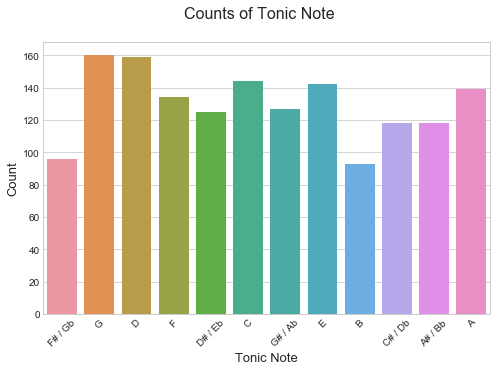

In [6]:
# Set plot style
sns.set_style("whitegrid")

# Set plot size
plt.figure(figsize=(8,5))

# Plot distribution of tonic_note
sns.countplot(x='tonic_note', data=data)

# Style graph
plt.suptitle('Counts of Tonic Note', size=16)
plt.xlabel('Tonic Note', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.xticks(rotation=45);

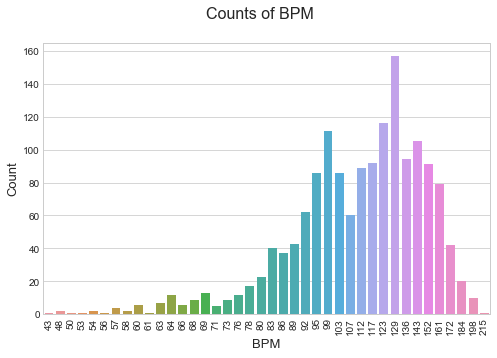

In [7]:
# Set plot size
plt.figure(figsize=(8,5))

# Plot distribution of BPM
sns.countplot(x='BPM', data=data)

# Style graph
plt.suptitle('Counts of BPM', size=16)
plt.xlabel('BPM', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.xticks(rotation=90);

### View class distribution of target variable

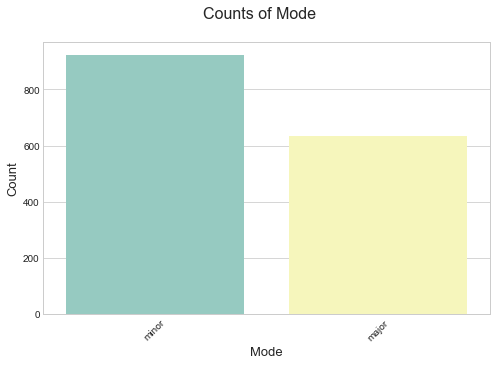

In [8]:
# Set plot size
plt.figure(figsize=(8,5))

# Plot distribution of mode
sns.countplot(x='mode', data=data, palette='Set3')

# Style graph
plt.suptitle('Counts of Mode', size=16)
plt.xlabel('Mode', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.xticks(rotation=45);

In [9]:
# Check proportion of minor vs. major
print('minor: {}%'.format(round((data['mode'].value_counts()[0] / data.shape[0]), 2)*100))
print('major: {}%'.format(round((data['mode'].value_counts()[1] / data.shape[0]), 2)*100))

minor: 59.0%
major: 41.0%


### Transform (setup data for models)

In [10]:
data.head()

,BPM,mode,mode_int,rmse_mean,rmse_std,spec_cent_mean,spec_cent_std,title,tonic_int,tonic_note,zcr_mean,zcr_std
0,99,minor,2,0.1534,0.0952,2022.30,1123.68,001 Love Yourself,6,F# / Gb,0.0978,0.0957
1,117,minor,2,0.1015,0.0760,1936.88,1174.04,001 Robin Thicke ft T,7,G,0.0904,0.0931
2,107,minor,2,0.0856,0.0522,2105.42,1159.97,001 Rolling In The Deep,7,G,0.0867,0.0764
3,117,major,1,0.1281,0.0885,2258.09,894.09,001-luis_fonsi_feat_daddy_yankee_-_despacito,2,D,0.1140,0.0706
4,89,minor,2,0.2135,0.0984,2170.56,996.12,001-sia_feat_sean_paul_-_cheap_thrills,6,F# / Gb,0.0983,0.0726


In [11]:
#Reorder columns
data = data[['tonic_note',
             'BPM',
             'rmse_mean',
             'rmse_std',
             'spec_cent_mean',
             'spec_cent_std',
             'zcr_mean',
             'zcr_std',
             'tonic_int',
             'mode_int'
            ]]

In [12]:
# Define X, y
X = data.iloc[:,1:9]
y = data.iloc[:,9]

In [13]:
# Split data into train, holdout split
X_tr, X_holdout, y_tr, y_holdout = train_test_split(X, y, test_size=0.3, random_state=1)

In [14]:
# Split train into train, test split
X_train, X_test, y_train, y_test = train_test_split(X_tr, y_tr, test_size=0.3, random_state=1)

In [15]:
# Create list of model and accuracy dicts
list_of_perform = []

# List to keep track of models
models = []

# List to keep track of y_scores
y_scores = []

# Part 2: Models

## 1 - Logistic Regression

### 1 - A) Logistic Regression Baseline Model

In [16]:
# Instantiate model
lr_baseline = LogisticRegression(random_state=1)

# Calculate accuracy of train
lr_base_acc = cross_val_score(lr_baseline, X_train, y_train).mean()
lr_base_std = cross_val_score(lr_baseline, X_train, y_train).std()
print('Accuracy of log reg baseline (TRAIN): {} +/- {}'.format(round(lr_base_acc, 2), round(lr_base_std, 2)))

# Fit model
lr_baseline.fit(X_train, y_train)

# Get predictions and probabilities
lr_base_preds = lr_baseline.predict(X_test)
lr_base_y_score = lr_baseline.predict_proba(X_test)

# Calculate accuracy of test
lr_base_acc_test = round(accuracy_score(y_test, lr_base_preds), 2)
print(f'Accuracy of log reg baseline (TEST): {lr_base_acc_test}')

print()

# Get precision, recall, f1-score
precision, recall, fscore, support = score(y_test, lr_base_preds, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

# Add model and accuracy dict to list
list_of_perform.append(dict([
    ('Model', 'LogReg Base'),
    ('Train Accuracy', round(lr_base_acc, 2)),
    ('Test Accuracy', lr_base_acc_test),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(fscore, 2))
     ]))

# Add model to list
models.append('LogReg Base')

# Add y_score to list
y_scores.append(lr_base_y_score)

Accuracy of log reg baseline (TRAIN): 0.68 +/- 0.02
Accuracy of log reg baseline (TEST): 0.65

Precision : 0.6365826538176427
Recall    : 0.6282383419689119
F-score   : 0.6297672016526299


### 1 - B) Grid Search Logistic Regression

In [17]:
# Define the parameter values that should be searched
C_range = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 0.01, 0.1, 1, 10, 40, 50, 60, 100, 1000]
fit_intercept_range = [True, False]

print(C_range,
      fit_intercept_range)

[1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 40, 50, 60, 100, 1000] [True, False]


In [18]:
# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(C=C_range,
                  fit_intercept=fit_intercept_range,)
print(param_grid)

{'C': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 40, 50, 60, 100, 1000], 'fit_intercept': [True, False]}


In [19]:
# Instantiate and fit the grid
lr_grid = GridSearchCV(lr_baseline, param_grid)
lr_grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 40, 50, 60, 100, 1000], 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [20]:
# View best parameter
print('Best parameters found:')
print()
print(lr_grid.best_params_)

Best parameters found:

{'C': 40, 'fit_intercept': True}


In [21]:
# View the complete results
#lr_grid.grid_scores_

### 1 - C) Logistic Regression Optimized w/ Grid Search

In [22]:
# Instantiate model
lr_opt = LogisticRegression(C=100, fit_intercept=True, random_state=1)

# Calculate accuracy of train
lr_opt_acc = cross_val_score(lr_opt, X_train, y_train).mean()
lr_opt_std = cross_val_score(lr_opt, X_train, y_train).std()
print('Accuracy of log reg optimized (TRAIN): {} +/- {}'.format(round(lr_opt_acc, 2), round(lr_opt_std, 2)))

# Fit model
lr_opt.fit(X_train, y_train)

# Get predictions and probabilities
lr_opt_preds = lr_opt.predict(X_test)
lr_opt_y_score = lr_opt.predict_proba(X_test)

# Calculate accuracy of test
lr_opt_acc_test = round(accuracy_score(y_test, lr_opt_preds), 2)
print(f'Accuracy of log reg optimized (TEST): {lr_opt_acc_test}')

print()

# Get precision, recall, f1-score
precision, recall, fscore, support = score(y_test, lr_opt_preds, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

# Add model and accuracy dict to list
list_of_perform.append(dict([
    ('Model', 'LogReg Opt GS'),
    ('Train Accuracy', round(lr_opt_acc, 2)),
    ('Test Accuracy', lr_opt_acc_test),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(fscore, 2))
     ]))

# Add model to list
models.append('LogReg Opt GS')

# Add y_score to list
y_scores.append(lr_opt_y_score)

Accuracy of log reg optimized (TRAIN): 0.68 +/- 0.01
Accuracy of log reg optimized (TEST): 0.65

Precision : 0.6365826538176427
Recall    : 0.6282383419689119
F-score   : 0.6297672016526299


## 2 - KNN

### 2 - A) KNN Baseline Model

In [23]:
# Instantiate model
neigh_base = KNeighborsClassifier()

# Calculate accuracy of train
neigh_base_acc = cross_val_score(neigh_base, X_train, y_train).mean()
neigh_base_std = cross_val_score(neigh_base, X_train, y_train).std()
print('Accuracy of KNN baseline (TRAIN): {} +/- {}'.format(round(neigh_base_acc, 2), round(neigh_base_std, 2)))

# Fit model
neigh_base.fit(X_train, y_train)

# Get predictions and probabilities
neigh_base_preds = neigh_base.predict(X_test)
neigh_base_y_score = neigh_base.predict_proba(X_test)

# Calculate accuracy of test
neigh_base_acc_test = round(accuracy_score(y_test, neigh_base_preds), 2)
print(f'Accuracy of KNN baseline (TEST): {neigh_base_acc_test}')

print()

# Get precision, recall, f1-score
precision, recall, fscore, support = score(y_test, neigh_base_preds, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

# Add model and accuracy dict to list
list_of_perform.append(dict([
    ('Model', 'KNN Base'),
    ('Train Accuracy', round(neigh_base_acc, 2)),
    ('Test Accuracy', neigh_base_acc_test),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(fscore, 2))
     ]))

# Add model to list
models.append('KNN Base')

# Add y_score to list
y_scores.append(neigh_base_y_score)

Accuracy of KNN baseline (TRAIN): 0.58 +/- 0.02
Accuracy of KNN baseline (TEST): 0.57

Precision : 0.546613394216134
Recall    : 0.5426301136803031
F-score   : 0.5408408890315334


### 2 - B) Grid Search KNN

In [24]:
# Define parameters that should be searched
n_neighbors_range = [2, 3, 4, 5, 6, 7, 8, 9, 10]
weights_range = ['uniform', 'distance']
algorithm_range = ['ball_tree', 'kd_tree', 'brute']
p_range = [1, 2, 3]

print(n_neighbors_range,
      weights_range,
      algorithm_range,
      p_range
     )

[2, 3, 4, 5, 6, 7, 8, 9, 10] ['uniform', 'distance'] ['ball_tree', 'kd_tree', 'brute'] [1, 2, 3]


In [25]:
# Create a parameter grid: map the parameter names to the values that should be searched
param_grid_2 = dict(n_neighbors=n_neighbors_range,
                    weights=weights_range,
                    algorithm=algorithm_range,
                    p=p_range
                   )

print(param_grid_2)

{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'p': [1, 2, 3]}


In [26]:
# Instantiate and fit the grid
knn_grid = GridSearchCV(neigh_base, param_grid_2)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'p': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [27]:
# View best parameters
print('Best parameters found:')
print()
print(knn_grid.best_params_)

Best parameters found:

{'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


### 2 - C) KNN Optimized w/ Grid Search

In [28]:
# Instantiate the model
knn_opt = KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='auto', p=1)

# Calculate accuracy of train
knn_opt_acc = cross_val_score(knn_opt, X_train, y_train).mean()
knn_opt_std = cross_val_score(knn_opt, X_train, y_train).std()
print('Accuracy of KNN optimized (TRAIN): {} +/- {}'.format(round(knn_opt_acc, 2), round(knn_opt_std, 2)))

# Fit model
knn_opt.fit(X_train, y_train)

# Get predictions and probabilities
knn_opt_preds = knn_opt.predict(X_test)
knn_opt_y_score = knn_opt.predict_proba(X_test)

# Calculate accuracy of test
knn_opt_acc_test = round(accuracy_score(y_test, knn_opt_preds), 2)
print(f'Accuracy of KNN optimized (TEST): {knn_opt_acc_test}')

print()

# Get precision, recall, f1-score
precision, recall, fscore, support = score(y_test, knn_opt_preds, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

# Add model and accuracy dict to list
list_of_perform.append(dict([
    ('Model', 'KNN Opt GS'),
    ('Train Accuracy', round(knn_opt_acc, 2)),
    ('Test Accuracy', knn_opt_acc_test),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(fscore, 2))
     ]))

# Add model to list
models.append('KNN Opt GS')

# Add y_score to list
y_scores.append(knn_opt_y_score)

Accuracy of KNN optimized (TRAIN): 0.63 +/- 0.03
Accuracy of KNN optimized (TEST): 0.68

Precision : 0.6669108910891088
Recall    : 0.6629611012296033
F-score   : 0.664385904892234


## 3 - SVC

### 3 - A) SVC Baseline Model

In [29]:
# Instantiate the model
svc_base = SVC(probability=True, random_state=1)

# Calculate accuracy of train
svc_base_acc = cross_val_score(svc_base, X_train, y_train).mean()
svc_base_std = cross_val_score(svc_base, X_train, y_train).std()
print('Accuracy of SVC baseline (TRAIN): {} +/- {}'.format(round(svc_base_acc, 2), round(svc_base_std, 2)))

# Fit model
svc_base.fit(X_train, y_train)

# Get predictions and probabilities
svc_base_preds = svc_base.predict(X_test)
svc_base_y_score = svc_base.predict_proba(X_test)

# Calculate accuracy of test
svc_base_acc_test = round(accuracy_score(y_test, svc_base_preds), 2)
print(f'Accuracy of SVC baseline (TEST): {svc_base_acc_test}')

print()

# Get precision, recall, f1-score
precision, recall, fscore, support = score(y_test, svc_base_preds, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

# Add model and accuracy dict to list
list_of_perform.append(dict([
    ('Model', 'SVC Base'),
    ('Train Accuracy', round(svc_base_acc, 2)),
    ('Test Accuracy', svc_base_acc_test),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(fscore, 2))
     ]))

# Add model to list
models.append('SVC Base')

# Add y_score to list
y_scores.append(svc_base_y_score)

Accuracy of SVC baseline (TRAIN): 0.63 +/- 0.0
Accuracy of SVC baseline (TEST): 0.66

Precision : 0.8184818481848185
Recall    : 0.5895522388059702
F-score   : 0.5410116374030216


### 3 - B) Normalize data for SVC Grid Search (linear kernel is v. sensitive)

In [30]:
# Before I do the grid search, I need to normalize (since the linear kernel is v. sensitive non-normalized data)
# Create mapper with StandardScaler()
mapper = DataFrameMapper([
    (['BPM'], MinMaxScaler(feature_range=(0, 1))),
    (['rmse_mean'], MinMaxScaler(feature_range=(0, 1))),
    (['rmse_std'], MinMaxScaler(feature_range=(0, 1))),
    (['spec_cent_mean'], MinMaxScaler(feature_range=(0, 1))),
    (['spec_cent_std'], MinMaxScaler(feature_range=(0, 1))),
    (['zcr_mean'], MinMaxScaler(feature_range=(0, 1))),
    (['zcr_std'], MinMaxScaler(feature_range=(0, 1))),
    (['tonic_int'], MinMaxScaler(feature_range=(0, 1))),
    (['mode_int'], MinMaxScaler(feature_range=(0, 1)))
    
], df_out=True)

In [31]:
# Fit and transform mapper
#data_norm = np.round(mapper.fit_transform(data.copy()), 4)
data_norm = mapper.fit_transform(data.copy())

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [32]:
data_norm.head(2)

,BPM,rmse_mean,rmse_std,spec_cent_mean,spec_cent_std,zcr_mean,zcr_std,tonic_int,mode_int
0,0.325581,0.362304,0.424155,0.491340,0.543960,0.322723,0.356575,0.545455,1.0
1,0.430233,0.231177,0.331401,0.465179,0.572977,0.290009,0.345102,0.636364,1.0


In [33]:
# Define X, y
X_norm = data_norm.iloc[:,:8]
y_norm = data_norm.iloc[:,8]

# Split data into train, holdout split
X_tr_norm, X_holdout_norm, y_tr_norm, y_holdout_norm = train_test_split(X_norm, y_norm, test_size=0.3, random_state=1)

# Split data into train, test split
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_tr_norm, y_tr_norm, test_size=0.3, random_state=1)

### 3 - C) SVC Normalized Baseline Model

In [34]:
# Instantiate the model
svc_base_norm = SVC(probability=True, random_state=1)

# Calculate accuracy of train
svc_base_norm_acc = cross_val_score(svc_base_norm, X_train_norm, y_train_norm).mean()
svc_base_norm_std = cross_val_score(svc_base_norm, X_train_norm, y_train_norm).std()
print('Accuracy of SVC normalized baseline (TRAIN): {} +/- {}'.format(round(svc_base_norm_acc, 2), round(svc_base_norm_std, 2)))

# Fit model
svc_base_norm.fit(X_train_norm, y_train_norm)

# Get predictions and probabilities
svc_base_norm_preds = svc_base_norm.predict(X_test_norm)
svc_base_norm_y_score = svc_base_norm.predict_proba(X_test_norm)

# Calculate accuracy of test
svc_base_norm_acc_test = round(accuracy_score(y_test_norm, svc_base_norm_preds), 2)
print(f'Accuracy of SVC normalized baseline (TEST): {svc_base_norm_acc_test}')

print()

# Get precision, recall, f1-score
precision, recall, fscore, support = score(y_test_norm, svc_base_norm_preds, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

# Add model and accuracy dict to list
list_of_perform.append(dict([
    ('Model', 'SVC Norm Base'),
    ('Train Accuracy', round(svc_base_norm_acc, 2)),
    ('Test Accuracy', svc_base_norm_acc_test),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(fscore, 2))
     ]))

# Add model to list
models.append('SVC Norm Base')

# Add y_score to list
y_scores.append(svc_base_norm_y_score)

Accuracy of SVC normalized baseline (TRAIN): 0.7 +/- 0.02
Accuracy of SVC normalized baseline (TEST): 0.7

Precision : 0.689465706707086
Recall    : 0.6933338488902637
F-score   : 0.6905806451612904


### 3 - D) Grid Search SVC

In [35]:
# Define parameters that should be searched
C_range = [1e-5, 1e-4, 1e-3, 0.01, 0.1, 1, 10, 50, 100, 1000]
kernel_range = ['linear', 'poly', 'rbf', 'sigmoid']
tol_range = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

print(C_range,
      kernel_range,
      tol_range
     )

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100, 1000] ['linear', 'poly', 'rbf', 'sigmoid'] [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]


In [36]:
# Create a parameter grid: map the parameter names to the values that should be searched
param_grid_3 = dict(C=C_range,
                    kernel=kernel_range,
                    tol=tol_range
                   )

print(param_grid_3)

{'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100, 1000], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'tol': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]}


In [37]:
# Instantiate the grid
svc_grid = GridSearchCV(svc_base_norm, param_grid_3)

# Fit the model
svc_grid.fit(X_train_norm, y_train_norm)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
  verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100, 1000], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'tol': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [38]:
# View best parameters
print('Best parameters found:')
print()
print(svc_grid.best_params_)

Best parameters found:

{'C': 50, 'kernel': 'poly', 'tol': 0.3}


In [39]:
# View the complete results
#svc_grid.grid_scores_

### 3 - E) SVC Optimized w/ Grid Search

In [40]:
# Instantiate the model
svc_opt = SVC(C=50, kernel='poly', tol=0.3, probability=True, random_state=1)

# Calculate accuracy of train
svc_opt_acc = cross_val_score(svc_opt, X_train_norm, y_train_norm).mean()
svc_opt_std = cross_val_score(svc_opt, X_train_norm, y_train_norm).std()
print('Accuracy of SVC optimized w/ GridSearch (TRAIN): {} +/- {}'.format(round(svc_opt_acc, 2), round(svc_opt_std, 2)))

# Fit model
svc_opt.fit(X_train_norm, y_train_norm)

# Get predictions and probabilities
svc_opt_preds = svc_opt.predict(X_test_norm)
svc_opt_y_score = svc_opt.predict_proba(X_test_norm)

# Calculate accuracy of test
svc_opt_acc_test = round(accuracy_score(y_test_norm, svc_opt_preds), 2)
print(f'Accuracy of SVC optimized w/ GridSearch (TEST): {svc_opt_acc_test}')

print()

# Get precision, recall, f1-score
precision, recall, fscore, support = score(y_test_norm, svc_opt_preds, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

# Add model and accuracy dict to list
list_of_perform.append(dict([
    ('Model', 'SVC Opt GS'),
    ('Train Accuracy', round(svc_opt_acc, 2)),
    ('Test Accuracy', svc_opt_acc_test),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(fscore, 2))
     ]))

# Add model to list
models.append('SVC Opt GS')

# Add y_score to list
y_scores.append(svc_opt_y_score)

Accuracy of SVC optimized w/ GridSearch (TRAIN): 0.71 +/- 0.04
Accuracy of SVC optimized w/ GridSearch (TEST): 0.71

Precision : 0.7168984962406015
Recall    : 0.7230879282344753
F-score   : 0.7085971577318136


### 3 - F) Random Search SVC

In [41]:
# Define parameters that should be searched
param_rand = {"C": [1e-5, 1e-4, 1e-3, 0.01, 0.1, 1, 10, 50, 100, 1000, 10000, 100000],
              "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
              "tol": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]}

# Choose number of searches
n_iter_search = 30

# Instantiate the model
svc_random_search = RandomizedSearchCV(svc_base_norm, param_distributions=param_rand, n_iter=n_iter_search)

# Fit the model
svc_random_search.fit(X_train_norm, y_train_norm)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
  verbose=False),
          fit_params=None, iid=True, n_iter=30, n_jobs=1,
          param_distributions={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100, 1000, 10000, 100000], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'tol': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [42]:
# View best parameters
print('Best parameters found:')
print()
print(svc_random_search.best_params_)

Best parameters found:

{'tol': 0.01, 'kernel': 'rbf', 'C': 100000}


### 3 - G) SVC Optimized w/ Random Search

In [43]:
# Instantiate the model
svc_rand = SVC(C=1000, kernel='rbf', tol=0.001, probability=True, random_state=1)

# Calculate accuracy of train
svc_rand_acc = cross_val_score(svc_rand, X_train_norm, y_train_norm).mean()
svc_rand_std = cross_val_score(svc_rand, X_train_norm, y_train_norm).std()
print('Accuracy of SVC optimized w/ RandomSearch (TRAIN): {} +/- {}'.format(round(svc_rand_acc, 2), round(svc_rand_std, 2)))

# Fit model
svc_rand.fit(X_train_norm, y_train_norm)

# Get predictions and probabilities
svc_rand_preds = svc_rand.predict(X_test_norm)
svc_rand_y_score = svc_rand.predict_proba(X_test_norm)

# Calculate accuracy of test
svc_rand_acc_test = round(accuracy_score(y_test_norm, svc_rand_preds), 2)
print(f'Accuracy of SVC optimized w/ RandomSearch (TEST): {svc_rand_acc_test}')

print()

# Get precision, recall, f1-score
precision, recall, fscore, support = score(y_test_norm, svc_rand_preds, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

# Add model and accuracy dict to list
list_of_perform.append(dict([
    ('Model', 'SVC Opt RS'),
    ('Train Accuracy', round(svc_rand_acc, 2)),
    ('Test Accuracy', svc_rand_acc_test),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(fscore, 2))
     ]))

# Add model to list
models.append('SVC Opt RS')

# Add y_score to list
y_scores.append(svc_rand_y_score)

Accuracy of SVC optimized w/ RandomSearch (TRAIN): 0.71 +/- 0.0
Accuracy of SVC optimized w/ RandomSearch (TEST): 0.73

Precision : 0.7420309653916212
Recall    : 0.7466166576444204
F-score   : 0.7275739733592939


## 4 - Naive Bayes Classifier

### 4 - A) Naive Bayes Classifier Model

In [44]:
# Instantiate the model
nbc_base = GaussianNB()

# Calculate accuracy of train
nbc_base_acc = cross_val_score(nbc_base, X_train, y_train).mean()
nbc_base_std = cross_val_score(nbc_base, X_train, y_train).std()
print('Accuracy of Naive Bayes Classifier (TRAIN): {} +/- {}'.format(round(nbc_base_acc, 2), round(nbc_base_std, 2)))

# Fit model
nbc_base.fit(X_train, y_train)

# Get predictions and probabilities
nbc_base_preds = nbc_base.predict(X_test)
nbc_base_y_score = nbc_base.predict_proba(X_test)

# Calculate accuracy of test
nbc_base_acc_test = round(accuracy_score(y_test, nbc_base_preds), 2)
print(f'Accuracy of Naive Bayes Classifier (TEST): {nbc_base_acc_test}')

print()

# Get precision, recall, f1-score
precision, recall, fscore, support = score(y_test, nbc_base_preds, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

# Add model and accuracy dict to list
list_of_perform.append(dict([
    ('Model', 'Naive Bayes'),
    ('Train Accuracy', round(nbc_base_acc, 2)),
    ('Test Accuracy', nbc_base_acc_test),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(fscore, 2))
     ]))

# Add model to list
models.append('Naive Bayes')

# Add y_score to list
y_scores.append(nbc_base_y_score)

Accuracy of Naive Bayes Classifier (TRAIN): 0.7 +/- 0.03
Accuracy of Naive Bayes Classifier (TEST): 0.7

Precision : 0.691469747140277
Recall    : 0.6967558580156215
F-score   : 0.6921694480102696


## 5 - Decision Tree Classifier

### 5 - A) Decision Tree Baseline Model

In [45]:
# Instantiate the model
dt_base = DecisionTreeClassifier(random_state=1)

# Calculate accuracy of train
dt_base_acc = cross_val_score(dt_base, X_train, y_train).mean()
dt_base_std = cross_val_score(dt_base, X_train, y_train).std()
print('Accuracy of Decision Tree baseline (TRAIN): {} +/- {}'.format(round(dt_base_acc, 2), round(dt_base_std, 2)))

# Fit model
dt_base.fit(X_train, y_train)

# Get predictions and probabilities
dt_base_preds = dt_base.predict(X_test)
dt_base_y_score = dt_base.predict_proba(X_test)

# Calculate accuracy of test
dt_base_acc = round(accuracy_score(y_test, dt_base_preds), 2)
print(f'Accuracy of Decision Tree baseline (TEST): {dt_base_acc}')

print()

# Get precision, recall, f1-score
precision, recall, fscore, support = score(y_test, dt_base_preds, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

# Add model and accuracy dict to list
list_of_perform.append(dict([
    ('Model', 'DecTree Base'),
    ('Train Accuracy', round(dt_base_acc, 2)),
    ('Test Accuracy', dt_base_acc),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(fscore, 2))
     ]))

# Add model to list
models.append('DecTree Base')

# Add y_score to list
y_scores.append(dt_base_y_score)

Accuracy of Decision Tree baseline (TRAIN): 0.72 +/- 0.02
Accuracy of Decision Tree baseline (TEST): 0.75

Precision : 0.7410282953761214
Recall    : 0.7430786482097286
F-score   : 0.7419348629504158


### 5 - B) Grid Search Decision Tree

In [46]:
# Define parameters that should be searched
criterion_range = ['gini', 'entropy']
splitter_range = ['best', 'random']
max_depth_range = [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
min_samples_split_range = [10, 20, 50, 100, 500]
min_samples_leaf_range = [10, 20, 50, 100, 250, 500]

print(criterion_range,
      splitter_range,
      max_depth_range,
      min_samples_split_range,
      min_samples_leaf_range
)

['gini', 'entropy'] ['best', 'random'] [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] [10, 20, 50, 100, 500] [10, 20, 50, 100, 250, 500]


In [47]:
# Create a parameter grid: map the parameter names to the values that should be searched
param_grid_4 = dict(criterion=criterion_range,
                    splitter=splitter_range,
                    max_depth=max_depth_range,
                    min_samples_split=min_samples_split_range,
                    min_samples_leaf=min_samples_leaf_range
)

print(param_grid_4)

{'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [10, 20, 50, 100, 500], 'min_samples_leaf': [10, 20, 50, 100, 250, 500]}


In [48]:
# Instantiate the grid
dt_grid = GridSearchCV(dt_base, param_grid_4)

# Fit the model
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [10, 20, 50, 100, 500], 'min_samples_leaf': [10, 20, 50, 100, 250, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [49]:
# View best parameters
print('Best parameters found:')
print()
print(dt_grid.best_params_)

Best parameters found:

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 10, 'splitter': 'best'}


### 5 - C) Decision Tree Optimized w/ Grid Search

In [50]:
# Instantiate the model
dt_opt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=7,
                                min_samples_split=10, min_samples_leaf=10, random_state=1)

# Calculate accuracy
dt_opt_acc = cross_val_score(dt_opt, X_train, y_train).mean()
dt_opt_std = cross_val_score(dt_opt, X_train, y_train).std()
print('Accuracy of Decision Tree optimized (TEST): {} +/- {}'.format(round(dt_opt_acc, 2), round(dt_opt_std, 2)))

# Fit model
dt_opt.fit(X_train, y_train)

# Get predictions and probabilities
dt_opt_preds = dt_opt.predict(X_test)
dt_opt_y_score = dt_opt.predict_proba(X_test)

# Calculate accuracy of test
dt_opt_acc_test = round(accuracy_score(y_test, dt_opt_preds), 2)
print(f'Accuracy of Decision Tree optimized (TEST): {dt_opt_acc_test}')

print()

# Get precision, recall, f1-score
precision, recall, fscore, support = score(y_test, dt_opt_preds, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

# Add model and accuracy dict to list
list_of_perform.append(dict([
    ('Model', 'DecTree Opt GS'),
    ('Train Accuracy', round(dt_opt_acc, 2)),
    ('Test Accuracy', dt_opt_acc_test),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(fscore, 2))
     ]))

# Add model to list
models.append('DecTree Opt GS')

# Add y_score to list
y_scores.append(dt_opt_y_score)

Accuracy of Decision Tree optimized (TEST): 0.72 +/- 0.01
Accuracy of Decision Tree optimized (TEST): 0.77

Precision : 0.7777693989895181
Recall    : 0.7848580929549145
F-score   : 0.7670940170940171


### 5 - D) Visualize Decision Tree

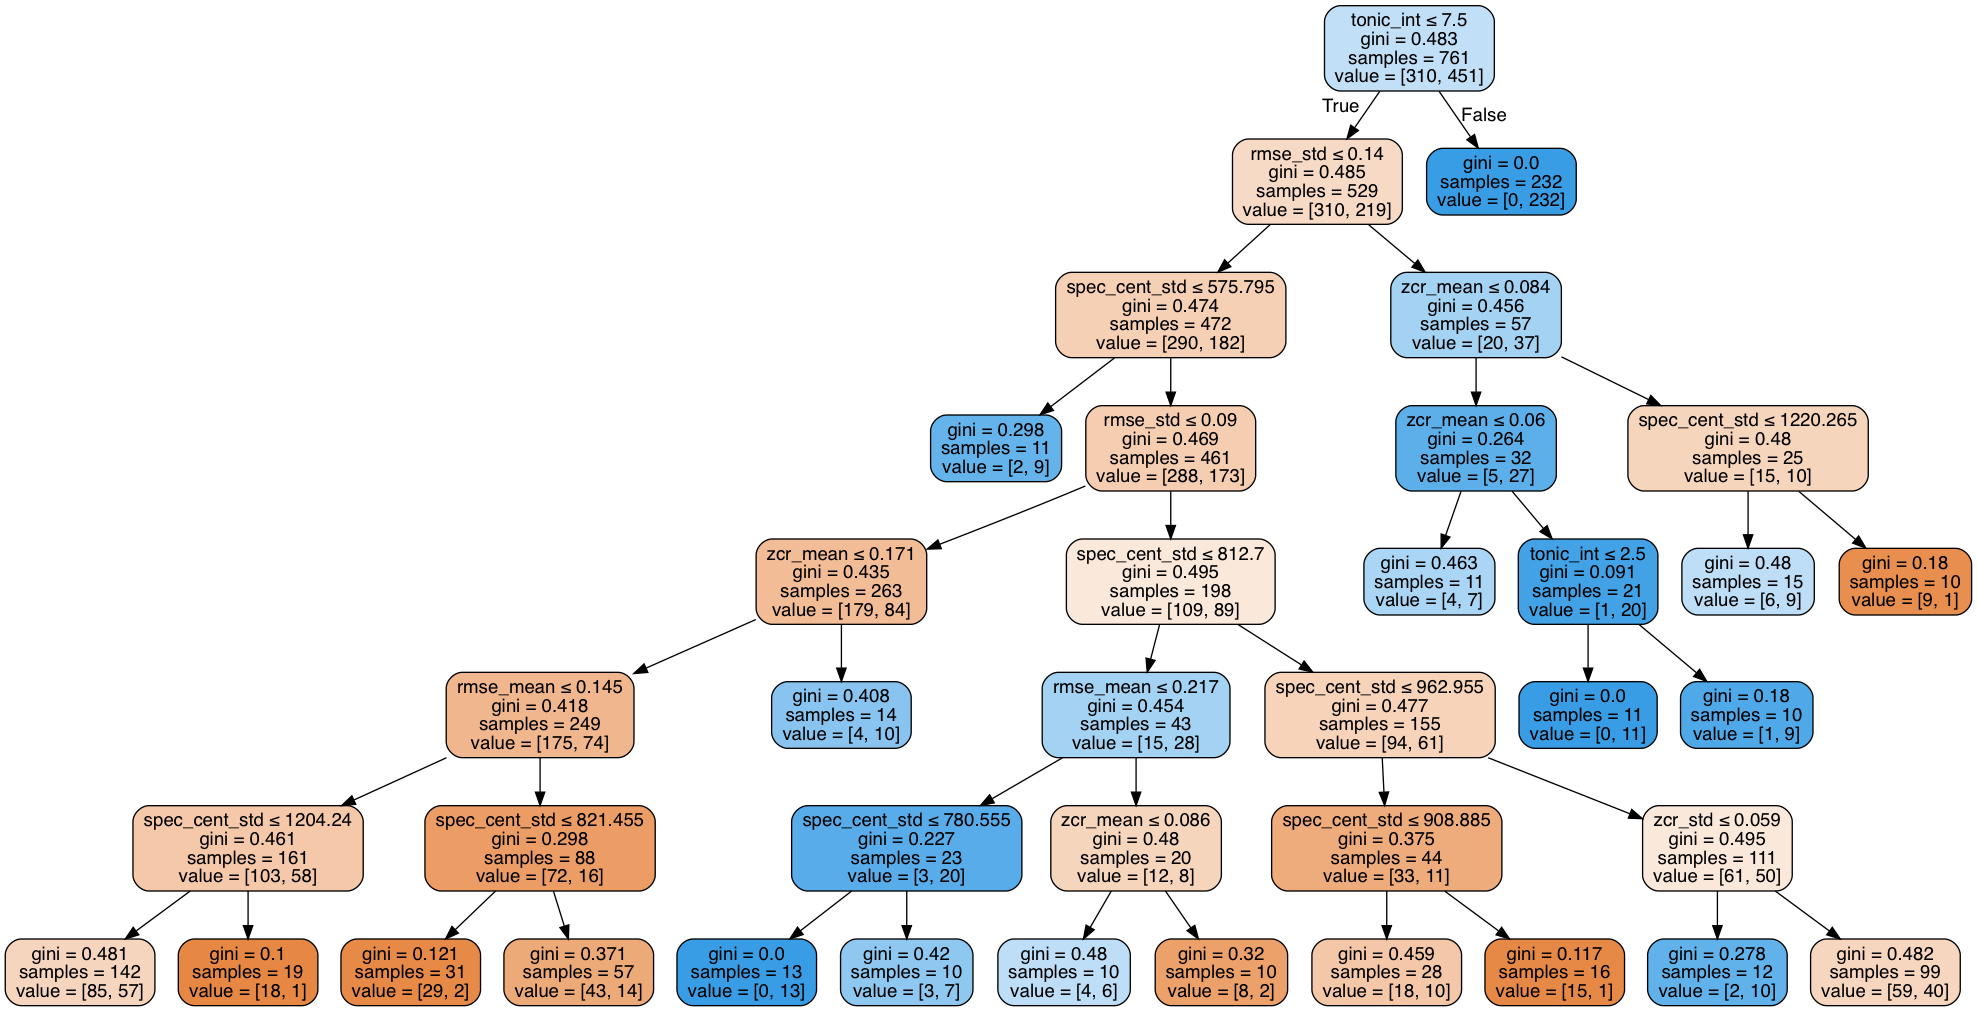

In [51]:
# Get visual of fitted Decision Tree
dot_data = StringIO()
export_graphviz(dt_opt, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X_train.columns
               )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [52]:
# View feature importances
pd.DataFrame({
    'feature': X_train.columns,
    'importance': dt_opt.feature_importances_
})

,feature,importance
0,BPM,0.000000
1,rmse_mean,0.049172
2,rmse_std,0.064191
3,spec_cent_mean,0.000000
4,spec_cent_std,0.132029
5,zcr_mean,0.077710
6,zcr_std,0.023257
7,tonic_int,0.653640


## 6 - Random Forest Classifier

### 6 - A) Random Forest Baseline Model

In [53]:
# Instantiate the model
rf_base = RandomForestClassifier(random_state=1)

# Calculate accuracy of train
rf_base_acc = cross_val_score(rf_base, X_train, y_train).mean()
rf_base_std = cross_val_score(rf_base, X_train, y_train).std()
print('Accuracy of Random Forest baseline (TRAIN): {} +/- {}'.format(round(rf_base_acc, 2), round(rf_base_std, 2)))

# Fit model
rf_base.fit(X_train, y_train)

# Get predictions and probabilities
rf_base_preds = rf_base.predict(X_test)
rf_base_y_score = rf_base.predict_proba(X_test)

# Calculate accuracy of test
rf_base_acc_test = round(accuracy_score(y_test, rf_base_preds), 2)
print(f'Accuracy of Random Forest baseline (TEST): {rf_base_acc_test}')

print()

# Get precision, recall, f1-score
precision, recall, fscore, support = score(y_test, rf_base_preds, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

# Add model and accuracy dict to list
list_of_perform.append(dict([
    ('Model', 'RandFor Base'),
    ('Train Accuracy', round(rf_base_acc, 2)),
    ('Test Accuracy', rf_base_acc_test),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(fscore, 2))
     ]))

# Add model to list
models.append('RandFor Base')

# Add y_score to list
y_scores.append(rf_base_y_score)

Accuracy of Random Forest baseline (TRAIN): 0.75 +/- 0.01
Accuracy of Random Forest baseline (TEST): 0.78

Precision : 0.7736043461970775
Recall    : 0.7823640863042302
F-score   : 0.7740194825480673


### 6 - B) Random Search Random Forest

In [54]:
# Define parameters that should be searched
n_estimators_range = [x for x in range(1,31)]
criterion_range = ['gini', 'entropy']
max_features_range = [None, 'auto', 'log2', 1, 2, 3, 4, 5, 6, 7, 8]
max_depth_range = [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
min_samples_split_range = [10, 20, 50, 100, 500]
min_samples_leaf_range = [10, 20, 50, 100, 250, 500]
bootstrap_range = [True, False]

# Create a parameter grid: map the parameter names to the values that should be searched
param_rand_rf = dict(n_estimators=n_estimators_range,
                     criterion=criterion_range,
                     max_features=max_features_range,
                     max_depth=max_depth_range,
                     min_samples_split=min_samples_split_range,
                     min_samples_leaf=min_samples_leaf_range,
                     bootstrap=bootstrap_range
)

print(param_rand_rf)

{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'criterion': ['gini', 'entropy'], 'max_features': [None, 'auto', 'log2', 1, 2, 3, 4, 5, 6, 7, 8], 'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [10, 20, 50, 100, 500], 'min_samples_leaf': [10, 20, 50, 100, 250, 500], 'bootstrap': [True, False]}


In [55]:
# Choose number of searches
n_iter_search = 40

# Instantiate the model
rf_random_search = RandomizedSearchCV(rf_base, param_distributions=param_rand_rf, n_iter=n_iter_search)

# Fit the model
rf_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=40, n_jobs=1,
          param_distributions={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'criterion': ['gini', 'entropy'], 'max_features': [None, 'auto', 'log2', 1, 2, 3, 4, 5, 6, 7, 8], 'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [10, 20, 50, 100, 500], 'min_samples_leaf': [10, 20, 50, 100, 250, 500], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs'

In [56]:
# View best parameters
print('Best parameters found:')
print()
print(rf_random_search.best_params_)

Best parameters found:

{'n_estimators': 25, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 3, 'max_depth': 7, 'criterion': 'gini', 'bootstrap': True}


### 6 - C) Random Forest Optimized w/ Random Search

In [57]:
# Instantiate the model
rf_opt = RandomForestClassifier(n_estimators=28,
                                criterion='gini',
                                max_features=4,
                                max_depth=4,
                                min_samples_split=100,
                                min_samples_leaf=10,
                                bootstrap=False,
                                random_state=1)

# Calculate the accuracy of train
rf_opt_acc = cross_val_score(rf_opt, X_train, y_train).mean()
rf_opt_std = cross_val_score(rf_opt, X_train, y_train).std()
print('Accuracy of Random Forest optimized (TRAIN): {} +/- {}'.format(round(rf_opt_acc, 2), round(rf_opt_std, 2)))

# Fit model
rf_opt.fit(X_train, y_train)

# Get predictions and probabilities
rf_opt_preds = rf_base.predict(X_test)
rf_opt_y_score = rf_base.predict_proba(X_test)

# Calculate accuracy of test
rf_opt_acc_test = round(accuracy_score(y_test, rf_opt_preds), 2)
print(f'Accuracy of Random Forest optimized (TEST): {rf_opt_acc_test}')

print()

# Get precision, recall, f1-score
precision, recall, fscore, support = score(y_test, rf_opt_preds, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

# Add model and accuracy dict to list
list_of_perform.append(dict([
    ('Model', 'RandFor Opt RS'),
    ('Train Accuracy', round(rf_opt_acc, 2)),
    ('Test Accuracy', rf_opt_acc_test),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(fscore, 2))
     ]))

# Add model to list
models.append('RandFor Opt RS')

# Add y_score to list
y_scores.append(rf_opt_y_score)

Accuracy of Random Forest optimized (TRAIN): 0.72 +/- 0.0
Accuracy of Random Forest optimized (TEST): 0.78

Precision : 0.7736043461970775
Recall    : 0.7823640863042302
F-score   : 0.7740194825480673


In [58]:
# View feature importances
pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_opt.feature_importances_
})

,feature,importance
0,BPM,0.005258
1,rmse_mean,0.007282
2,rmse_std,0.067693
3,spec_cent_mean,0.020444
4,spec_cent_std,0.084061
5,zcr_mean,0.007267
6,zcr_std,0.028600
7,tonic_int,0.779394


# Part 3: Performance

### Accuracy

In [59]:
model_perf = pd.DataFrame(data=list_of_perform)
model_perf = model_perf[['Model', 'Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
#model_perf.drop_duplicates(inplace=True)
model_perf

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1
0,LogReg Base,0.68,0.65,0.64,0.63,0.63
1,LogReg Opt GS,0.68,0.65,0.64,0.63,0.63
2,KNN Base,0.58,0.57,0.55,0.54,0.54
3,KNN Opt GS,0.63,0.68,0.67,0.66,0.66
4,SVC Base,0.63,0.66,0.82,0.59,0.54
5,SVC Norm Base,0.70,0.70,0.69,0.69,0.69
6,SVC Opt GS,0.71,0.71,0.72,0.72,0.71
7,SVC Opt RS,0.71,0.73,0.74,0.75,0.73
8,Naive Bayes,0.70,0.70,0.69,0.70,0.69
9,DecTree Base,0.75,0.75,0.74,0.74,0.74


### Plot ROC Curve

In [60]:
models
# y_scores

['LogReg Base',
 'LogReg Opt GS',
 'KNN Base',
 'KNN Opt GS',
 'SVC Base',
 'SVC Norm Base',
 'SVC Opt GS',
 'SVC Opt RS',
 'Naive Bayes',
 'DecTree Base',
 'DecTree Opt GS',
 'RandFor Base',
 'RandFor Opt RS']

In [61]:
# Convert y_test and y_test_norm to binary (previously 1, 2 --> now 0, 1)
y_test_bin = np.where(y_test == 1, 0, 1)
y_test_norm_bin = np.where(y_test_norm == 1, 0, 1)

In [62]:
def plot_roc_curves():
    plt.figure(figsize=(10,6))
    lw = 2
    
    # Logistic Regression Baseline
    fpr, tpr, thresholds = roc_curve(y_test_bin, lr_base_y_score[:,1], pos_label=1)
    auc_lr = roc_auc_score(y_test_bin, lr_base_y_score[:,1])
    plt.plot(fpr, tpr, color='r',
             lw=lw, label='LR Baseline, auc=%.3f' % auc_lr)
        
    # Logistic Regression w/ Grid Search
    fpr, tpr, thresholds = roc_curve(y_test_bin, lr_opt_y_score[:,1], pos_label=1)
    auc_lr_opt = roc_auc_score(y_test_bin, lr_opt_y_score[:,1])
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='LR Optimized, auc=%.3f' % auc_lr_opt)
        
    # KNN Baseline
    fpr, tpr, thresholds = roc_curve(y_test_bin, neigh_base_y_score[:,1], pos_label=1)
    auc_knn = roc_auc_score(y_test_bin, neigh_base_y_score[:,1])
    plt.plot(fpr, tpr, color='y',
             lw=lw, label='KNN Baseline, auc=%.3f' % auc_knn)
    
    # KNN w/ Grid Search
    fpr, tpr, thresholds = roc_curve(y_test_bin, knn_opt_y_score[:,1], pos_label=1)
    auc_knn_opt = roc_auc_score(y_test_bin, knn_opt_y_score[:,1])
    plt.plot(fpr, tpr, color='chartreuse',
             lw=lw, label='KNN Optimized, auc=%.3f' % auc_knn_opt)
    
    # SVC Baseline
    fpr, tpr, thresholds = roc_curve(y_test_bin, svc_base_y_score[:,1], pos_label=1)
    auc_svc = roc_auc_score(y_test_bin, svc_base_y_score[:,1])
    plt.plot(fpr, tpr, color='#ff1493',
             lw=lw, label='SVC Baseline, auc=%.3f' % auc_svc)
    
    # SVC Norm Baseline
    fpr, tpr, thresholds = roc_curve(y_test_norm_bin, svc_base_norm_y_score[:,0], pos_label=1)
    auc_svc_norm = roc_auc_score(y_test_norm_bin, svc_base_norm_y_score[:,0])
    plt.plot(fpr, tpr, color='g',
             lw=lw, label='SVC Norm Baseline, auc=%.3f' % auc_svc_norm)
    
    # SVC Norm w/ Grid Search
    fpr, tpr, thresholds = roc_curve(y_test_norm_bin, svc_opt_y_score[:,0], pos_label=1)
    auc_svc_gs = roc_auc_score(y_test_norm_bin, svc_opt_y_score[:,0])
    plt.plot(fpr, tpr, color='b',
             lw=lw, label='SVC Opt GridSearch, auc=%.3f' % auc_svc_gs)
    
    # SVC Norm w/ Random Search
    fpr, tpr, thresholds = roc_curve(y_test_norm_bin, svc_rand_y_score[:,0], pos_label=1)
    auc_svc_rs = roc_auc_score(y_test_norm_bin, svc_rand_y_score[:,0])
    plt.plot(fpr, tpr, color='#a1caf1',
             lw=lw, label='SVC Opt RandomSearch, auc=%.3f' % auc_svc_rs)
    
    # Naive Bayes
    fpr, tpr, thresholds = roc_curve(y_test_bin, nbc_base_y_score[:,1], pos_label=1)
    auc_nbc = roc_auc_score(y_test_bin, nbc_base_y_score[:,1])
    plt.plot(fpr, tpr, color='#9966cc',
             lw=lw, label='Naive Bayes, auc=%.3f' % auc_nbc)
    
    # Decision Tree Baseline
    fpr, tpr, thresholds = roc_curve(y_test_bin, dt_base_y_score[:,1], pos_label=1)
    auc_dt_base = roc_auc_score(y_test_bin, dt_base_y_score[:,1])
    plt.plot(fpr, tpr, color='m',
             lw=lw, label='Decision Tree Baseline, auc=%.3f' % auc_dt_base)
    
    # Decision Tree w/ Grid Search
    fpr, tpr, thresholds = roc_curve(y_test_bin, dt_opt_y_score[:,1], pos_label=1)
    auc_dt_opt = roc_auc_score(y_test_bin, dt_opt_y_score[:,1])
    plt.plot(fpr, tpr, color='#f4bbff',
             lw=lw, label='Decision Tree Optimized, auc=%.3f' % auc_dt_opt)
    
    # Random Forest Baseline
    fpr, tpr, thresholds = roc_curve(y_test_bin, rf_base_y_score[:,1], pos_label=1)
    auc_rf = roc_auc_score(y_test_bin, rf_base_y_score[:,1])
    plt.plot(fpr, tpr, color='#08e8de',
             lw=lw, label='Random Forest Baseline, auc=%.3f' % auc_rf)
    
    # Random Forest w/ Random Search
    fpr, tpr, thresholds = roc_curve(y_test_bin, rf_opt_y_score[:,1], pos_label=1)
    auc_rf_opt = roc_auc_score(y_test_bin, rf_opt_y_score[:,1])
    plt.plot(fpr, tpr, color='#00cc99',
             lw=lw, label='Random Forest Optimized, auc=%.3f' % auc_rf_opt)
    
    # Formatting
    plt.plot([0, 1], [0, 1], color='k', lw=lw, linestyle='--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=13)
    plt.ylabel('True Positive Rate', fontsize=13)
    plt.title('Receiver Operating Characteristic', fontsize=16)
    plt.legend(loc="lower right")
    plt.show()

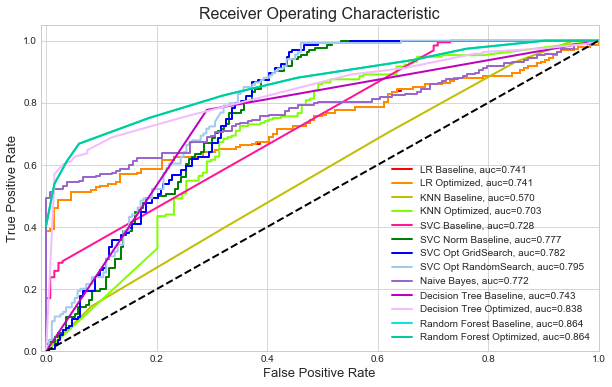

In [63]:
plot_roc_curves()

# Part 4: Holdout Test

In [64]:
print('Best models to test with Holdout set:')
print()
print('1. Decision Tree - Optimized w/ Grid Search')
print('2. Random Forest - Optimized w/ Random Search')
print('3. Support Vector Classifier - Optimized w/ Random Search')

Best models to test with Holdout set:

1. Decision Tree - Optimized w/ Grid Search
2. Random Forest - Optimized w/ Random Search
3. Support Vector Classifier - Optimized w/ Random Search


In [65]:
# Keep track of holdout accuracies
holdout_acc = []

### 1. Decision Tree - Optimized w/ Grid Search

In [66]:
# Get predictions and probabilities
dt_holdout_preds = dt_opt.predict(X_holdout)
dt_holdout_y_score = dt_opt.predict_proba(X_holdout)

# Use X_holdout, y_holdout to calculate accuracy
dt_holdout_acc = round(accuracy_score(y_holdout, dt_holdout_preds), 2)
print(f'Accuracy of Decision Tree Opt (holdout): {dt_holdout_acc}')

# Add model and accuracy dict to list
holdout_acc.append(dict([
    ('Model', 'Decision Tree GS'),
    ('Holdout Accuracy', dt_holdout_acc)
]))

Accuracy of Decision Tree Opt (holdout): 0.75


### 2. Random Forest - Optimized w/ Random Search

In [67]:
# Get predictions and probabilities
rf_holdout_preds = rf_opt.predict(X_holdout)
rf_holdout_y_score = rf_opt.predict_proba(X_holdout)

# Use X_holdout, y_holdout to calculate accuracy
rf_holdout_acc = round(accuracy_score(y_holdout, rf_holdout_preds), 2)
print(f'Accuracy of Random Forest Opt (holdout): {rf_holdout_acc}')

# Add model and accuracy dict to list
holdout_acc.append(dict([
    ('Model', 'Random Forest RS'),
    ('Holdout Accuracy', rf_holdout_acc)
]))

Accuracy of Random Forest Opt (holdout): 0.75


### 3. Support Vector Classifier - Optimized w/ Random Search

In [68]:
# Get predictions and probabilities
svc_holdout_preds = svc_opt.predict(X_holdout_norm)
svc_holdout_y_score = svc_opt.predict_proba(X_holdout_norm)

# Use X_holdout_norm, y_holdout_norm to calculate accuracy
svc_holdout_acc = round(accuracy_score(y_holdout_norm, svc_holdout_preds), 2)
print(f'Accuracy of SVC Opt (holdout): {svc_holdout_acc}')

# Add model and accuracy dict to list
holdout_acc.append(dict([
    ('Model', 'SVC RS'),
    ('Holdout Accuracy', svc_holdout_acc)
]))

Accuracy of SVC Opt (holdout): 0.73


In [69]:
# Reorder columns and rows
holdout_results = pd.DataFrame(data=holdout_acc, columns=['Model', 'Holdout Accuracy'])
holdout_results = holdout_results.reindex(index=[2, 0, 1])
holdout_results = holdout_results.reset_index(drop=True)

In [70]:
holdout_results

,Model,Holdout Accuracy
0,SVC RS,0.73
1,Decision Tree GS,0.75
2,Random Forest RS,0.75
